# NLP

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#importing dataset
data = pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t", quoting=3) #ignore double qute
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
data.shape

(1000, 2)

# TEXT CLEANING PROCESS

In [21]:
import re
import nltk
from nltk.corpus import stopwords 
# removing all form of verb only keep simple present form of verb to avoid same words repeatedly in different form 
from nltk.stem.porter import PorterStemmer 

In [22]:
#create object of stemer class
port_stem = PorterStemmer()

In [17]:
data["Review"][0]

'Wow... Loved this place.'

In [26]:
#removing all except A-Z and a-z and replace with space ,cnvrt lower case
review = re.sub("[^a-zA-Z]"," ",data["Review"][0]).lower()

#remove stopwords and stemming together
review = [port_stem.stem(word) for word in review.split() if word not in set(stopwords.words("english"))] 
review 

['wow', 'love', 'place']

In [27]:
#join list of words into single sentencesabs
" ".join(review)

'wow love place'

### Now apply all this to our 1000 reviews

In [28]:
clean_review = []

for i in range(1000):
    review = re.sub("[^a-zA-Z]"," ",data["Review"][i]).lower()

    review = [port_stem.stem(word) for word in review.split() if word not in set(stopwords.words("english"))] 

    review  = " ".join(review)
    
    clean_review.append(review)

In [30]:
clean_review[:10] #our final review

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [35]:
#creating our bag of word model or sparce matrix

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)#out of 1565 column we will take 1500 columns

X = cv.fit_transform(clean_review).toarray()#independent variable
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
X.shape #including only 1500 max_features

(1000, 1565)

In [36]:
#after adding max_features = 1500 check the shape
X.shape

(1000, 1500)

In [40]:
# dependent variable
Y = data.iloc[:,1].values
Y[:50]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [41]:
#Lets apply naive BAyes Classification model

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
#dividing data into training and testing part
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
naive_classifier = GaussianNB()

naive_classifier.fit(X_train, Y_train)

y_pred = naive_classifier.predict(X_test)

In [44]:
confusion_matrix(Y_test,y_pred)

array([[48, 48],
       [18, 86]], dtype=int64)

In [45]:
accuracy_score(Y_test, y_pred)

0.67

In [47]:
prob = naive_classifier.predict_proba(X_test)


from sklearn.metrics import roc_curve
from sklearn import metrics

prob_pos = prob[:,1]

fpr, tpr, threshold = roc_curve(Y_test, prob_pos)

#area under curve
roc_auc = metrics.auc(fpr, tpr)

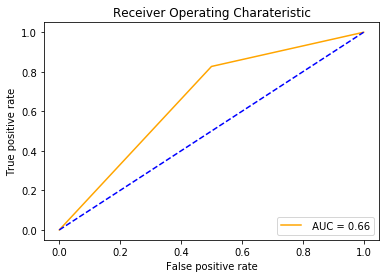

In [50]:
plt.title("Receiver Operating Charateristic")
plt.plot(fpr, tpr, color="orange",label=" AUC = %0.2f"%roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue",linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

## Applying Bernoulli Naive bayes classification

#### ** It is always better to use bernoulli's naive bayes classification where all the predictors are binary form 0 and 1**

In [51]:
bern_classifier = BernoulliNB()

bern_classifier.fit(X_train, Y_train)

y_pred = bern_classifier.predict(X_test)

In [52]:
confusion_matrix(Y_test,y_pred)

array([[71, 25],
       [26, 78]], dtype=int64)

In [53]:
accuracy_score(Y_test, y_pred)

0.745

In [54]:
prob = bern_classifier.predict_proba(X_test)


from sklearn.metrics import roc_curve
from sklearn import metrics

prob_pos = prob[:,1]

fpr, tpr, threshold = roc_curve(Y_test, prob_pos)

#area under curve
roc_auc = metrics.auc(fpr, tpr)

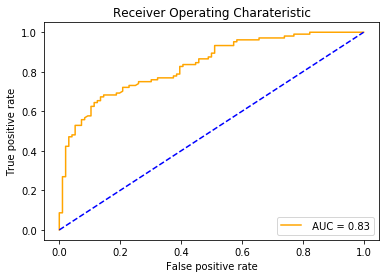

In [55]:
plt.title("Receiver Operating Charateristic")
plt.plot(fpr, tpr, color="orange",label=" AUC = %0.2f"%roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], color="blue",linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

## Note: 
* area under curve increased from 0.66 to 0.83
* accuracy score is also increased from 0.67 to 0.74
    

# ---------------------------------------------END-------------------------------------------------------